In [1]:
# Importing pandas module to perform operations on dataset
import pandas as pd

In [2]:
# extracting csv data indo pandas dataframe
df= pd.read_csv("Dataset.csv")

In [3]:
print("No of rows    : ",df.shape[0])
print("No of columns : ",df.shape[1])

No of rows    :  203
No of columns :  14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    int64  
 1   quarter   203 non-null    int64  
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 22.3 KB


In [5]:
# Converting year indo date format with respect to quarters
def convert_year_into_Date(df):    
    df['year'] = df['year'].astype(str)
    l = []
    for i in df.quarter:
        if i == 1:
            l.append('01')
        elif i == 2:
            l.append(str('04'))
        elif i == 3:
            l.append(str('07'))
        else:
            l.append(str('10'))
    df.insert(0, 'Date', df['year'] +'-'+ l)
    df.drop('year', axis=1, inplace=True)
    # Converting type of date column into datetime
    df['Date'] = pd.to_datetime(df['Date'])

In [6]:
convert_year_into_Date(df)

In [7]:
df.head(5)

,Date,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1971-01-01,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1971-04-01,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1971-07-01,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1971-10-01,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1972-01-01,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      203 non-null    datetime64[ns]
 1   quarter   203 non-null    int64         
 2   realgdp   203 non-null    float64       
 3   realcons  203 non-null    float64       
 4   realinv   203 non-null    float64       
 5   realgovt  203 non-null    float64       
 6   realdpi   203 non-null    float64       
 7   cpi       203 non-null    float64       
 8   m1        203 non-null    float64       
 9   tbilrate  203 non-null    float64       
 10  unemp     203 non-null    float64       
 11  pop       203 non-null    float64       
 12  infl      203 non-null    float64       
 13  realint   203 non-null    float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 22.3 KB


In [9]:
print("\tNo of NaN values  : \n")
df.isnull().sum()

	No of NaN values  : 



Date        0
quarter     0
realgdp     0
realcons    0
realinv     0
realgovt    0
realdpi     0
cpi         0
m1          0
tbilrate    0
unemp       0
pop         0
infl        0
realint     0
dtype: int64

In [10]:
# Setting Date column as index
df = df.set_index('Date',drop=True)

In [11]:
df.sample(5)

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Date,,,,,,,,,,,,,
2010-07-01,3,10328.787,6913.1,1700.071,681.472,7591.0,163.90,1086.0,4.49,4.5,277.003,1.71,2.78
1983-04-01,2,4398.829,2827.9,533.986,534.905,3245.3,40.60,224.9,4.76,5.9,207.661,4.96,-0.19
1996-04-01,2,6559.594,4299.9,952.841,664.839,4959.4,104.10,540.9,9.94,7.5,236.348,3.09,6.85
1992-01-01,1,5908.467,3798.4,781.114,548.115,4296.2,80.90,383.8,13.75,6.3,227.061,14.60,-0.85
1977-07-01,3,3636.285,2251.0,444.444,529.446,2542.6,31.65,166.0,3.93,4.4,194.997,0.89,3.04


In [12]:
# Saving dataset
# df.to_csv("Dataset_2.csv")

## Performing multivariate time series analysis 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# df = pd.read_csv('Dataset_2.csv')
# df = df.set_index('Date',drop=True)

In [14]:
def visulization(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    l = list(df.columns)
    for i in l[2:]:
        plt.figure(figsize=(14,4))
        plt.plot(df[i],ls='--',c='navy', linewidth=3,)
        plt.ylabel(i)


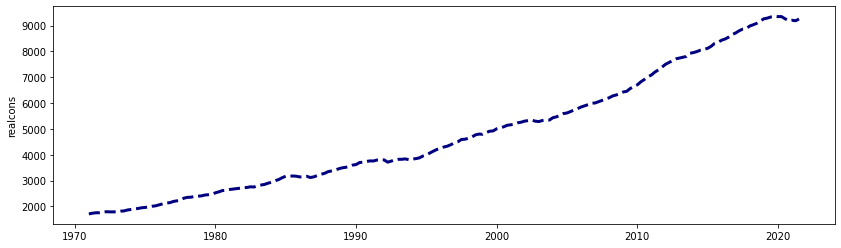

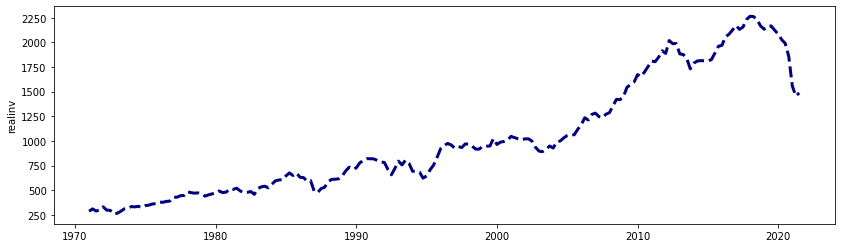

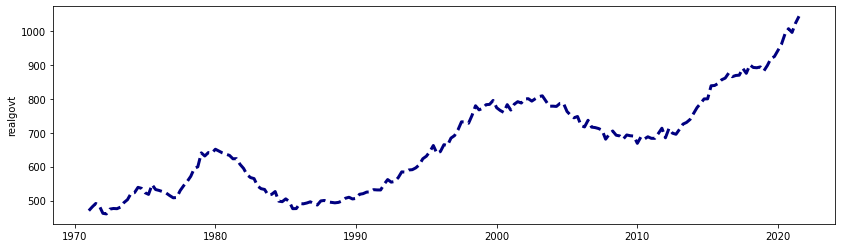

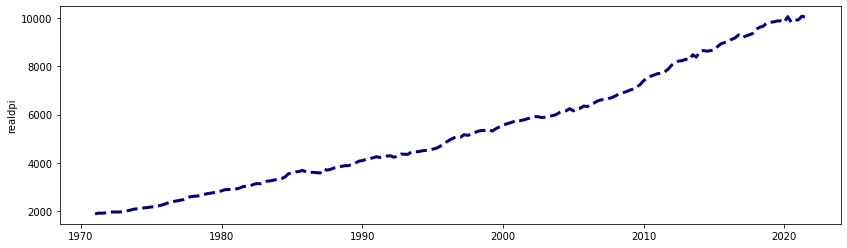

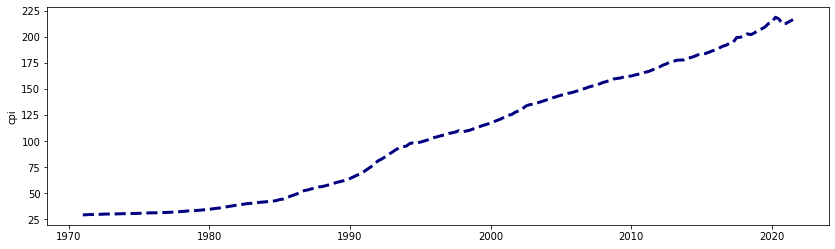

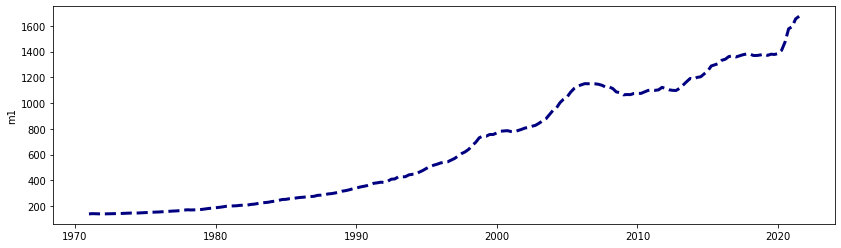

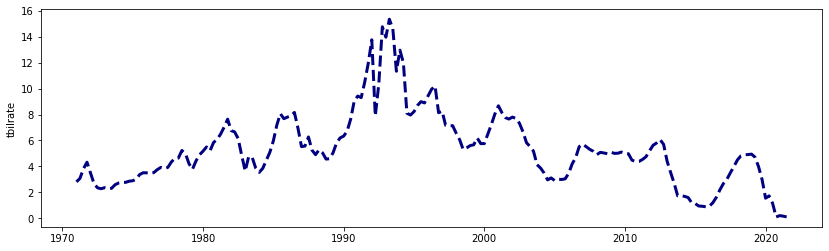

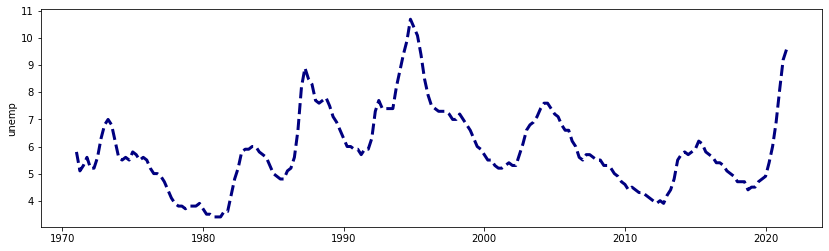

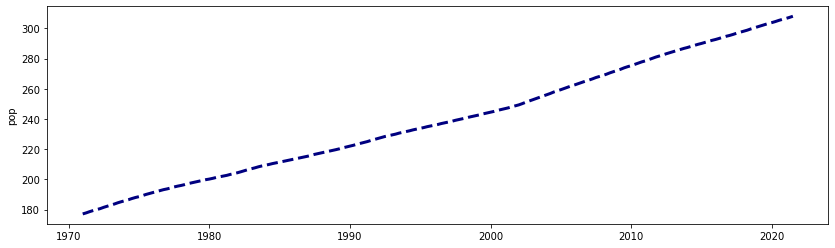

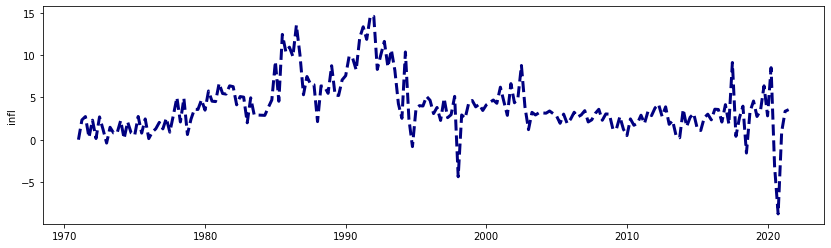

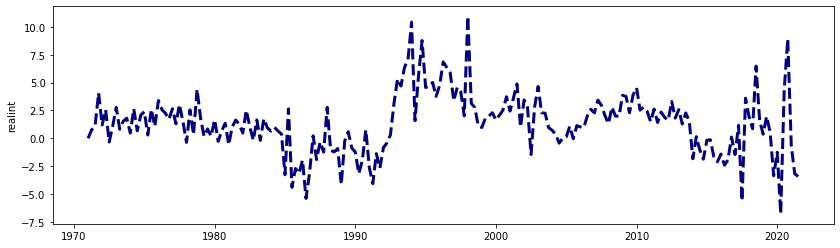

In [15]:
visulization(df)

### Most of the columns have same upward trend except _`tbilrate ,unemp ,infl and realint`_ .

In [2]:
# df2 = pd.read_csv('Dataset_2.csv')
# df2 = df2.set_index('Date',drop=True)

### Let’s implement the ADF Test on given data

In [16]:
from statsmodels.tsa.stattools import adfuller
from simple_colors import *
def adfuller_test(df):
    print(red("Note :",['bold','underlined']))
    print(black("\tNull Hypothesis(H0) :\tData has no unit root and is stationary",['bold']))
    print(black("\tAlternate  Hypothesis(H1) : Data has a unit root, indicating Data is non-stationary",['bold']))
    print(red('__'*50,['bold']))
    print()
    col = list(df.columns)[1:]
    for i in col:
        series = df[i]
        result=adfuller(series)
        #print('ADF Statistics: {}'.format(result[0]))
        print(red(f'\t\t\tp- value: of {i} is:\t{result[1]}',['bold']))
        if result[1] <= 0.05:
            print(blue("\tStrong evidence against the null hypothesis, So Data is is stationary",['bold']))
            print()
        else:
            print(blue("\tWeak evidence against null hypothesis, So Data is non-stationary ",['bold']))
            print()

In [17]:
adfuller_test(df)

Note :
	Null Hypothesis(H0) :	Data has no unit root and is stationary
	Alternate  Hypothesis(H1) : Data has a unit root, indicating Data is non-stationary
____________________________________________________________________________________________________

			p- value: of realgdp is:	0.9982455372335032
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of realcons is:	0.9976992503412904
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of realinv is:	0.6484956579101147
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of realgovt is:	0.9558411923961088
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of realdpi is:	1.0
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of cpi is:	0.9904328188337421
	Weak evidence against null hypothesis, So Data is non-stationary 

			p- value: of m1 is:	0.9987380758531885
	Weak evidence against null 

<h3 style="color:navy" >With the help of Dickey-Fuller Test (ADF Test) ,we can see that most of our data is non stationary. </h3>

<h4 style="color:#BA4A00 " ><i>We can also see this by following graphs.</i></h4>

In [18]:
def Data_Visulization(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
    for i, ax in enumerate(axes.flatten()):
        data = df[df.columns[i]]
        ax.plot(data, color='green', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

    plt.tight_layout();

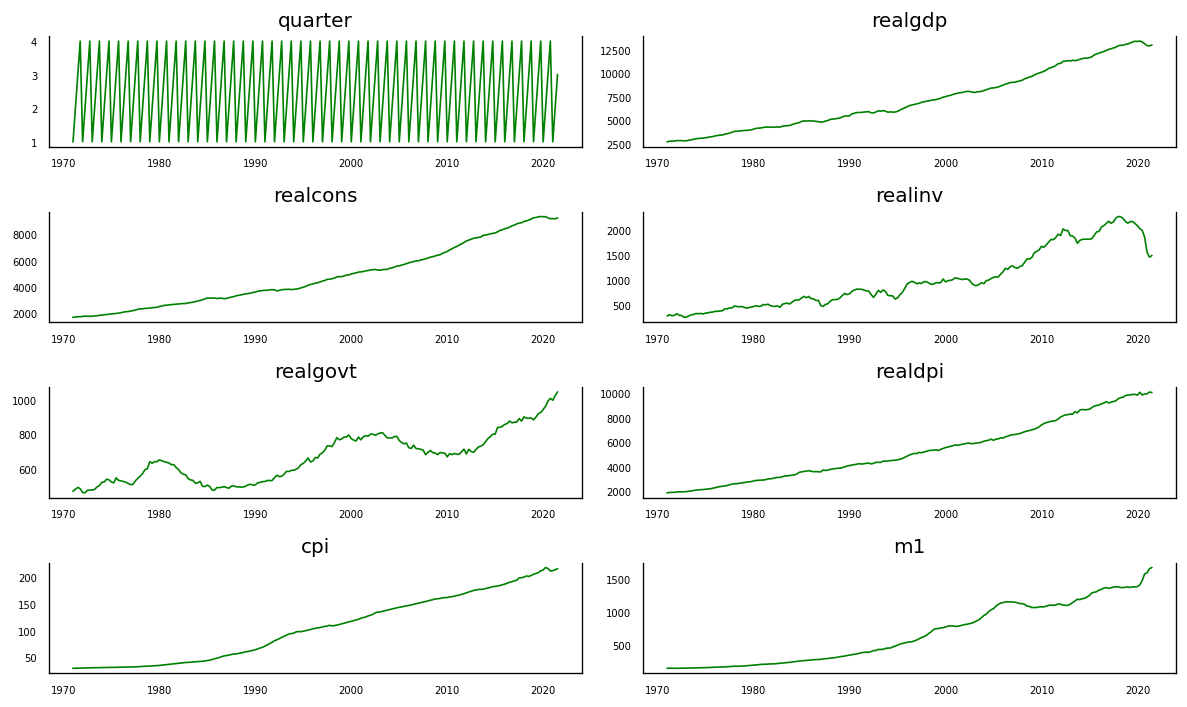

In [19]:
Data_Visulization(df)

### Now Using  Differencing Techniques to convert `non-stationary `  data into `stationary`.

In [ ]:
# df2.diff().dropna()

In [20]:
## Differencing data (i.e First Differcing)
def Differencing_Data(df):
    l = list(df.columns)
    for i in l:
        df[i+' :After_Differencing']=df[i]-df[i].shift(1)
    df.dropna(inplace=True)
    
Differencing_Data(df)

In [21]:
df.head(3)

,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,...,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
Date,,,,,,,,,,,,,,,,,,,,,
1971-04-01,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,...,23.961,11.256,32.8,0.17,2.0,0.26,-0.7,0.684,2.34,0.74
1971-07-01,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,...,-21.633,9.959,-3.3,0.20,-1.2,0.74,0.2,0.827,0.40,0.35
1971-10-01,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,...,10.130,-7.208,14.9,0.02,-0.5,0.51,0.3,0.729,-2.47,2.97


In [20]:
df.columns

Index(['quarter', 'realgdp', 'realcons', 'realinv', 'realgovt', 'realdpi',
       'cpi', 'm1', 'tbilrate', 'unemp', 'pop', 'infl', 'realint',
       'quarter :After_Differencing', 'realgdp :After_Differencing',
       'realcons :After_Differencing', 'realinv :After_Differencing',
       'realgovt :After_Differencing', 'realdpi :After_Differencing',
       'cpi :After_Differencing', 'm1 :After_Differencing',
       'tbilrate :After_Differencing', 'unemp :After_Differencing',
       'pop :After_Differencing', 'infl :After_Differencing',
       'realint :After_Differencing'],
      dtype='object')

In [22]:
df = df[['quarter :After_Differencing', 'realgdp :After_Differencing',
       'realcons :After_Differencing', 'realinv :After_Differencing',
       'realgovt :After_Differencing', 'realdpi :After_Differencing',
       'cpi :After_Differencing', 'm1 :After_Differencing',
       'tbilrate :After_Differencing', 'unemp :After_Differencing',
       'pop :After_Differencing', 'infl :After_Differencing',
       'realint :After_Differencing']]

In [23]:
#df3.to_csv("Dataset_3.csv")
df.shape

(202, 13)

In [24]:
df.head(3)

,quarter :After_Differencing,realgdp :After_Differencing,realcons :After_Differencing,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
Date,,,,,,,,,,,,,
1971-04-01,1.0,68.452,26.3,23.961,11.256,32.8,0.17,2.0,0.26,-0.7,0.684,2.34,0.74
1971-07-01,1.0,-3.313,18.1,-21.633,9.959,-3.3,0.20,-1.2,0.74,0.2,0.827,0.40,0.35
1971-10-01,1.0,9.716,1.9,10.130,-7.208,14.9,0.02,-0.5,0.51,0.3,0.729,-2.47,2.97


### Re-run ADF test on each differenced Data

In [25]:
adfuller_test(df)

Note :
	Null Hypothesis(H0) :	Data has no unit root and is stationary
	Alternate  Hypothesis(H1) : Data has a unit root, indicating Data is non-stationary
____________________________________________________________________________________________________

			p- value: of realgdp :After_Differencing is:	3.327882187668224e-08
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realcons :After_Differencing is:	0.0006479282158627493
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realinv :After_Differencing is:	4.29793280817715e-06
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realgovt :After_Differencing is:	0.00157164131940867
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realdpi :After_Differencing is:	1.449360615910768e-14
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of cpi :After_Differe

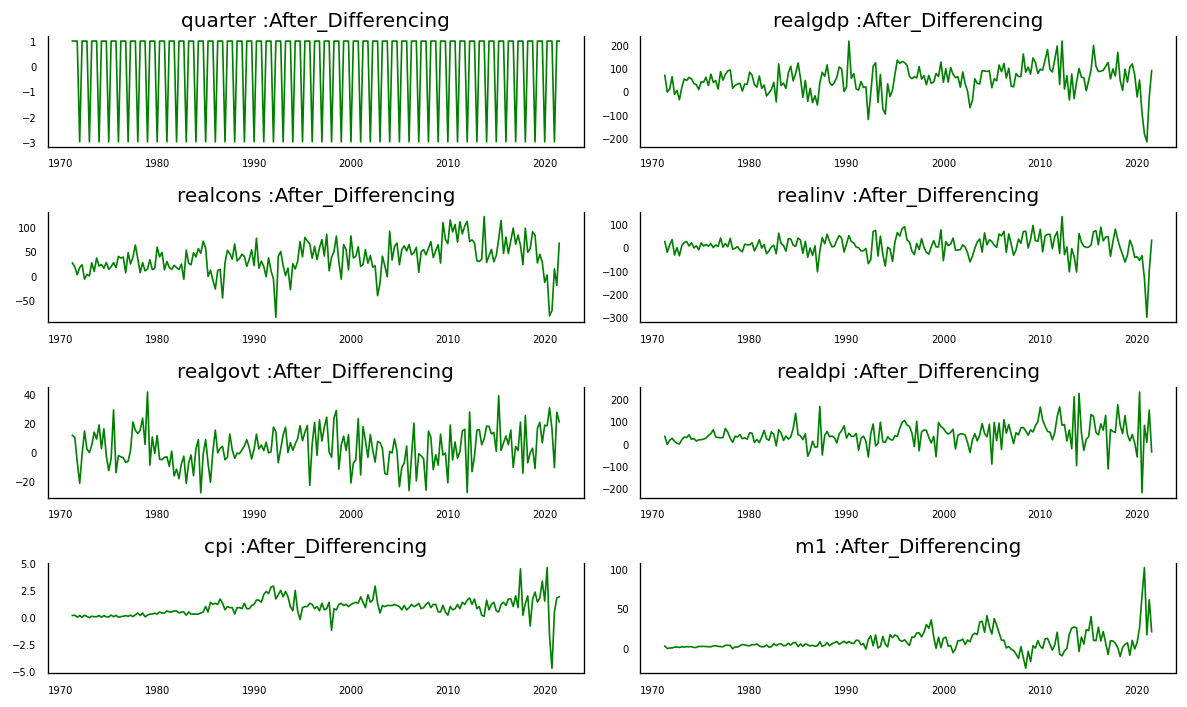

In [26]:
Data_Visulization(df)

####  Note : From adfuller_test results we can see that after first differcing most of columns become  stationary  except `cpi  and pop `.

In [29]:
# Performing Differcing again (i.e Second differcing)
df = df.diff().dropna()

In [30]:
# Data set after Second Differcing
df.head(3)

,quarter :After_Differencing,realgdp :After_Differencing,realcons :After_Differencing,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
Date,,,,,,,,,,,,,
1971-07-01,0.0,-71.765,-8.2,-45.594,-1.297,-36.1,0.03,-3.2,0.48,0.9,0.143,-1.94,-0.39
1971-10-01,0.0,13.029,-16.2,31.763,-17.167,18.2,-0.18,0.7,-0.23,0.1,-0.098,-2.87,2.62
1972-01-01,-4.0,52.779,14.9,22.236,-14.645,9.3,0.15,0.1,-1.34,-0.7,-0.108,4.51,-5.84


In [32]:
# Re-run ADF test on each differenced Data again 
adfuller_test(df)

Note :
	Null Hypothesis(H0) :	Data has no unit root and is stationary
	Alternate  Hypothesis(H1) : Data has a unit root, indicating Data is non-stationary
____________________________________________________________________________________________________

			p- value: of realgdp :After_Differencing is:	1.3902269851110058e-06
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realcons :After_Differencing is:	8.527677902811637e-30
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realinv :After_Differencing is:	1.5639664289702058e-12
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realgovt :After_Differencing is:	1.189811524971239e-18
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of realdpi :After_Differencing is:	2.514602801719009e-09
	Strong evidence against the null hypothesis, So Data is is stationary

			p- value: of cpi :After_Di

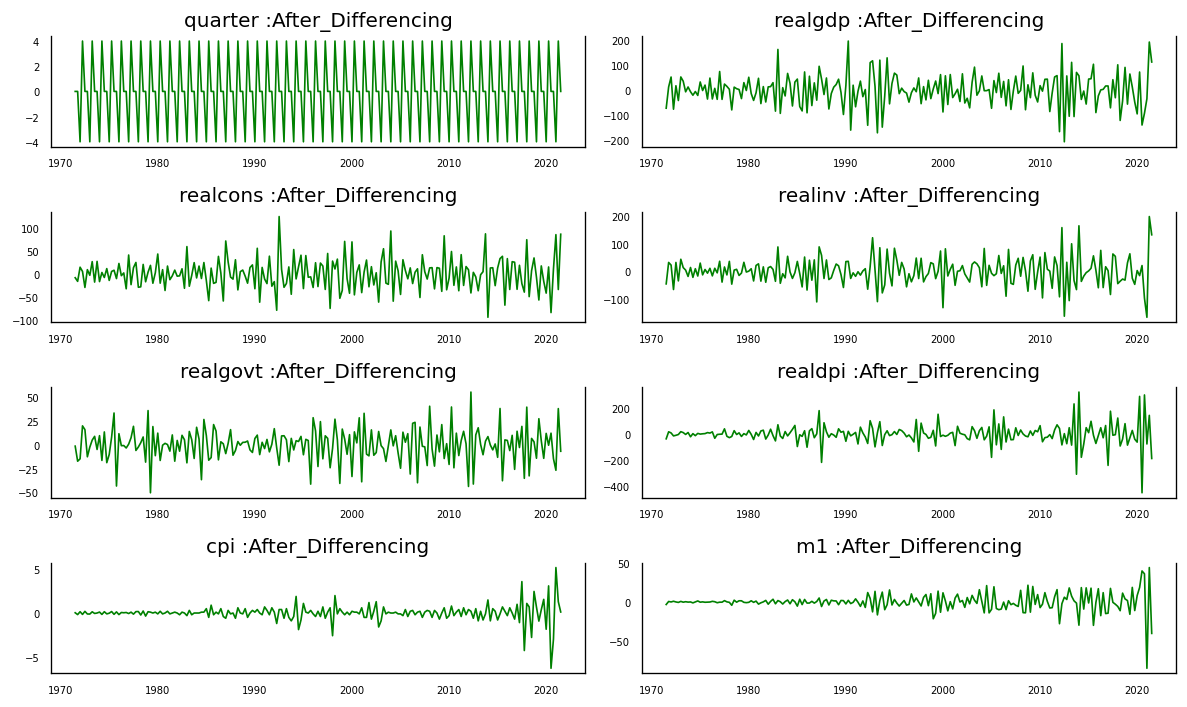

In [31]:
Data_Visulization(df)

In [33]:
df.to_csv('Stationary_Data.csv')

## Now our dataset is `STATIONARY` .

In [34]:
import pandas as pd
df = pd.read_csv('Stationary_Data.csv')
df = df.set_index('Date',drop=True)
df.drop('quarter :After_Differencing', axis=1, inplace=True)
df.head(3)

,realgdp :After_Differencing,realcons :After_Differencing,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
Date,,,,,,,,,,,,
1971-07-01,-71.765,-8.2,-45.594,-1.297,-36.1,0.03,-3.2,0.48,0.9,0.143,-1.94,-0.39
1971-10-01,13.029,-16.2,31.763,-17.167,18.2,-0.18,0.7,-0.23,0.1,-0.098,-2.87,2.62
1972-01-01,52.779,14.9,22.236,-14.645,9.3,0.15,0.1,-1.34,-0.7,-0.108,4.51,-5.84


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 1971-07-01 to 2021-07-01
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   realgdp :After_Differencing   201 non-null    float64
 1   realcons :After_Differencing  201 non-null    float64
 2   realinv :After_Differencing   201 non-null    float64
 3   realgovt :After_Differencing  201 non-null    float64
 4   realdpi :After_Differencing   201 non-null    float64
 5   cpi :After_Differencing       201 non-null    float64
 6   m1 :After_Differencing        201 non-null    float64
 7   tbilrate :After_Differencing  201 non-null    float64
 8   unemp :After_Differencing     201 non-null    float64
 9   pop :After_Differencing       201 non-null    float64
 10  infl :After_Differencing      201 non-null    float64
 11  realint :After_Differencing   201 non-null    float64
dtypes: float64(12)
memory usage: 20.4+ KB


In [40]:
def ACF_and_PACF_Visulization(df):
    from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
    import warnings
    warnings.filterwarnings('ignore')
    print(red('\tNote :',['bold','underlined']))
    print(black('\t\t1st graph is ACF and 2nd is PACF',['bold']))
    import matplotlib.pyplot as plt
    %matplotlib inline
    l = list(df.columns)[1:]

    for i  in l:
        acf = plot_acf(df[i],title='ACF plot of '+i)
        pacf = plot_pacf(df[i],title='PACF plot of '+i)
        warnings.filterwarnings('ignore')

	Note :
		1st graph is ACF and 2nd is PACF


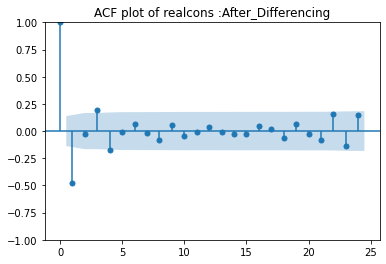

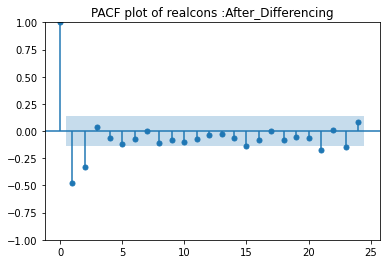

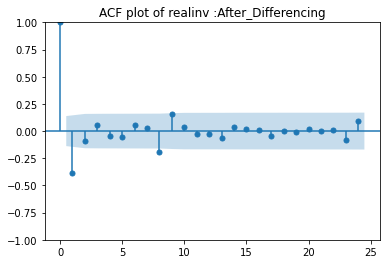

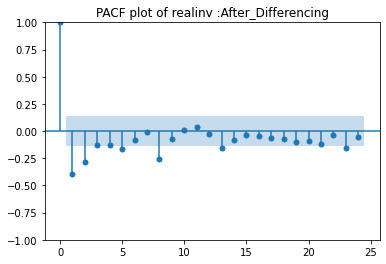

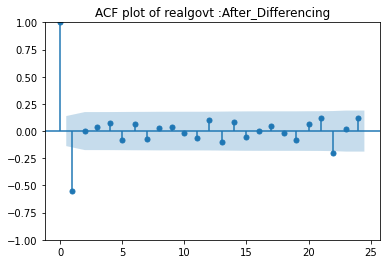

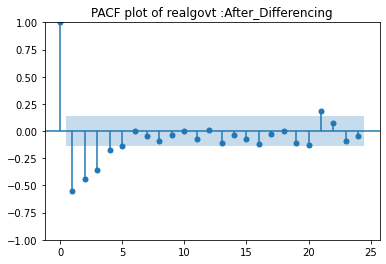

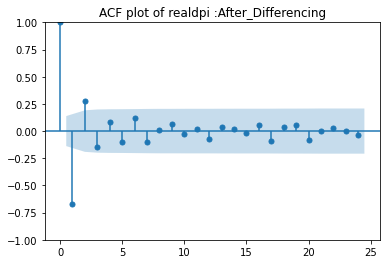

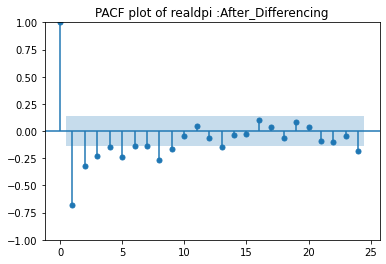

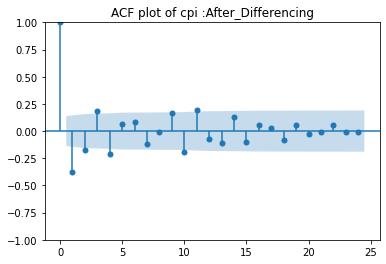

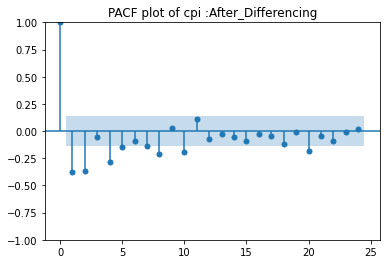

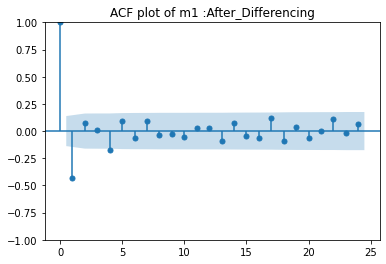

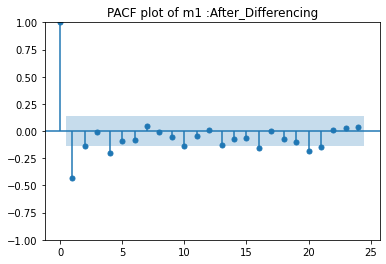

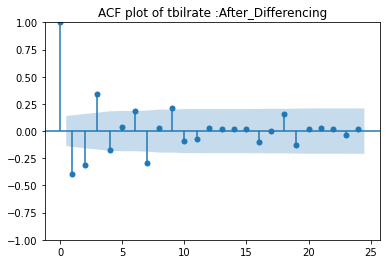

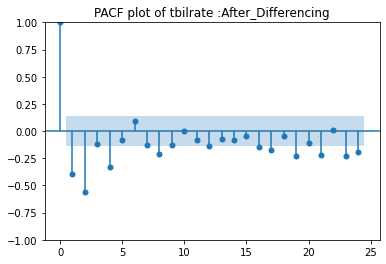

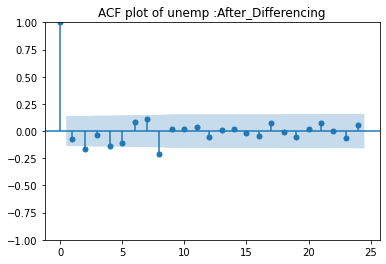

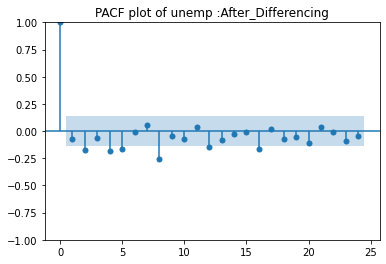

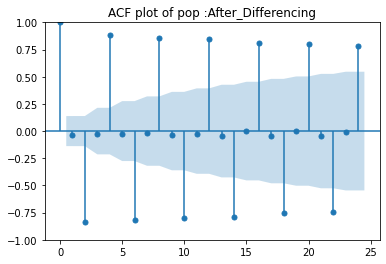

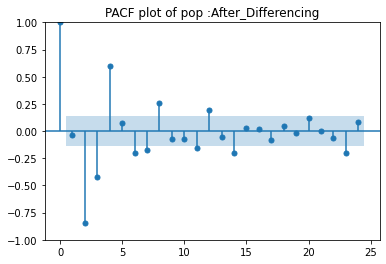

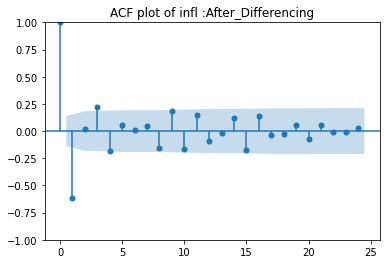

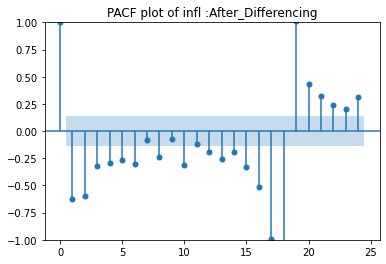

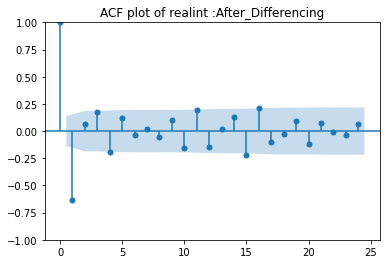

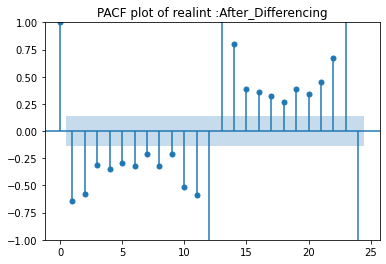

In [41]:
ACF_and_PACF_Visulization(df)

## Selecting the Order (P) of VAR model . 
### We iteratively fit increasing orders of VAR model and pick the order that gives a model with least AIC.

In [38]:
#df.corr()

In [42]:
from statsmodels.tsa.api import VAR
model = VAR(df)
import warnings
warnings.filterwarnings('ignore')
for i in range(1,15):
    result = model.fit(i)
    warnings.filterwarnings('ignore')
    print('\tLag Order =', i,end = ' | ')
    print('AIC : ', result.aic)
    
    print()

	Lag Order = 1 | AIC :  23.053293732987452

	Lag Order = 2 | AIC :  19.746005022378515

	Lag Order = 3 | AIC :  18.936593585051735

	Lag Order = 4 | AIC :  17.94014289209703

	Lag Order = 5 | AIC :  17.778035861941582

	Lag Order = 6 | AIC :  17.714765257066603

	Lag Order = 7 | AIC :  17.261285572268307

	Lag Order = 8 | AIC :  16.43148300002204

	Lag Order = 9 | AIC :  16.413125359281707

	Lag Order = 10 | AIC :  15.57196794946968

	Lag Order = 11 | AIC :  14.454611549687241

	Lag Order = 12 | AIC :  12.566240868526819

	Lag Order = 13 | AIC :  8.323855340413308

	Lag Order = 14 | AIC :  -1.711948113191525



# Lets go with Lag Order  == 14

In [43]:
df_train = df[:-18]
df_test = df[-18:]

In [44]:
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

In [45]:
model = VAR(df_train)

In [46]:
m = model.select_order()
print(m.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        23.84       24.06   2.256e+10       23.93
1        19.78      22.66*   3.904e+08       20.95
2        17.17       22.71   2.952e+07       19.42
3        16.59       24.78   1.739e+07       19.91
4        15.51       26.35   6.628e+06       19.91
5        15.70       29.20   9.803e+06       21.18
6        15.71       31.87   1.360e+07       22.27
7        15.03       33.84   1.099e+07       22.66
8        14.22       35.69   9.658e+06       22.93
9        13.69       37.82   1.531e+07       23.48
10       11.96       38.74   1.147e+07       22.83
11       8.146       37.59   2.198e+06       20.09
12       3.088       35.18   4.523e+05       16.11
13     -11.60*       23.15      138.4*      2.497*
--------------------------------------------------


In [47]:
var_model = VARMAX(df, order=(14,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

In [48]:
n_forecast = 18
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)

predictions=predict.predicted_mean

In [49]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_gdp=math.sqrt(mean_squared_error(predictions['realgdp :After_Differencing'],df_test['realgdp :After_Differencing']))
print('Mean value of gdp is : {}. Root Mean Squared Error is :{}'.format(mean(df_test['realgdp :After_Differencing']),rmse_ulc))


In [50]:
n_forecast = 18
predict = fitted_model.get_prediction(start=len(df_train),end=len(df_train) + n_forecast-1)

predictions=predict.predicted_mean

In [65]:
predictions

,quarter :After_Differencing,realgdp :After_Differencing,realcons :After_Differencing,realinv :After_Differencing,realgovt :After_Differencing,realdpi :After_Differencing,cpi :After_Differencing,m1 :After_Differencing,tbilrate :After_Differencing,unemp :After_Differencing,pop :After_Differencing,infl :After_Differencing,realint :After_Differencing
2021-10-01,1.560347,-103.604574,-87.079360,-45.413287,-9.431539,76.197881,-1.249770,13.662814,0.941260,-0.322750,-0.118651,-0.804754,1.730703
2022-01-01,-5.302683,81.305054,49.583802,-15.531729,-1.310161,-42.495005,1.539924,-12.256795,-0.727775,0.167070,-0.074990,3.113631,-3.997469
2022-04-01,4.711888,-91.445838,-33.630195,-13.086185,6.696207,44.726216,-0.295886,9.919906,-0.436710,0.155101,0.063556,-1.992879,1.233279
2022-07-01,-1.017374,82.591788,25.283920,47.062515,5.132331,-50.768458,-0.398928,-0.844457,0.823942,-0.198210,0.117865,-1.142646,2.161971
2022-10-01,1.449270,-54.998108,-18.673743,-35.830230,-12.321939,43.674897,-0.067864,1.494464,-0.239580,0.053403,-0.121722,1.925068,-2.352790
2023-01-01,-4.840251,15.905363,12.481272,-2.491038,2.429472,-36.717075,0.265741,-3.359630,-0.295793,0.034289,-0.045945,-1.116297,0.971003
2023-04-01,4.615451,0.421707,-9.000300,6.881605,7.066289,34.816403,-0.016813,4.501698,0.222321,0.045385,0.061732,0.802739,-0.869778
2023-07-01,-1.272244,6.500364,9.805204,7.374296,-2.879689,-31.228161,-0.141912,-1.516031,0.099726,-0.090113,0.093193,-0.808796,1.166851
2023-10-01,1.314177,-19.030501,-10.259174,-16.023033,-3.537591,18.942378,-0.131963,3.668285,-0.190681,0.034705,-0.110776,0.168984,-0.571293
2024-01-01,-4.262880,9.203572,8.198563,0.884461,-0.284981,-12.173697,0.180846,-3.344071,0.084270,0.042690,-0.031852,0.279144,-0.124612


In [51]:
# forecasting Gross Domestic Product (realgdp) for next 6 quarter(or 18 months)
n_forecast = 18
predict = fitted_model.(start=len(df),end=len(df) + n_forecast-1)

realgdp_for_next_6_quarter =predict.predicted_mean

In [ ]:
realgdp_for_next_6_quarter